# **Sistemas Recomendadores**

**Máster de Ciberseguridad e Inteligencia de Datos**

***Asignatura:*** Técnicas Avanzadas de Análisis de Datos

***Alumno:*** Carlos Barreda Falciano

***Correo:*** alu0100596113@ull.edu.es

***Curso:*** 2021-2022

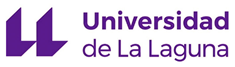

## Descripción del proyecto sobre sistemas recomendadores basados en contenido

**Objetivo**: El objetivo de este proyecto es implementar un sistema de
recomendación basado en contenido, que nos permita recomendar los
mejores documentos para un cliente, mediante el algoritmo de
clasificación KNN.

**Metodología**: Estudiar los modelos basados en el contenido en el material de clase. Crear un software que reciba un archivo de texto plano con extensión txt, que contenga el conjunto de posibles documentos a recomendar al
usuario final. Cada documento irá representado en una línea del
archivo. 

El software debe proporcionar como salida lo siguiente:

*   Para cada documento, tabla con las siguientes columnas: 
    *   Índice del término.
    *   Término.
    *   TF.
    *   IDF.
    *   TF-IDF. 

*   Similaridad coseno entre cada par de documentos. 



## Librerías

In [ ]:
# ==============================================================================
# Librerías utilizadas
# ==============================================================================
import pandas as pd
import numpy as np
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lectura y carga de datos

In [ ]:
# ==============================================================================
# Montaje del directorio de Google Drive donde se encuentra almacenado el archivo txt
# ==============================================================================
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# ==============================================================================
# Lectura de datos y almacenamiento en Dataframe
# ==============================================================================
data = pd.read_csv("/content/gdrive/MyDrive/TAAD/SR/data.txt", sep='\n', header=None)
data.head(10)

,0
0,"1.Aromas include tropical fruit, broom, brimst..."
1,"2.This is ripe and fruity, a wine that is smoo..."
2,"3.Tart and snappy, the flavors of lime flesh a..."
3,"4.Pineapple rind, lemon pith and orange blosso..."
4,"5.Much like the regular bottling from 2012, th..."
5,6.Blackberry and raspberry aromas show a typic...
6,"7.Here's a bright, informal red that opens wit..."


## Preprocesado de los datos

Se realiza una limpieza sobre el dataframe donde se ha almacenado los datos que contiene el archivo txt con el catálogo de los documnetos que deben ser recomendados.  

In [ ]:
# ==============================================================================
# Se añade un nombre a la columna y se agrega una columna con el Id del documento
# ==============================================================================
data.columns = ['Documento']
data['id'] = np.arange(len(data)) # Añadimos la col 'id' para identificar a cada documento
data = data[['id', 'Documento']] # Cambia el orden para que ID sea primera col
data.columns
data

,id,Documento
0,0,"1.Aromas include tropical fruit, broom, brimst..."
1,1,"2.This is ripe and fruity, a wine that is smoo..."
2,2,"3.Tart and snappy, the flavors of lime flesh a..."
3,3,"4.Pineapple rind, lemon pith and orange blosso..."
4,4,"5.Much like the regular bottling from 2012, th..."
5,5,6.Blackberry and raspberry aromas show a typic...
6,6,"7.Here's a bright, informal red that opens wit..."


In [ ]:
# ==============================================================================
# Se elimina la enumeración inicial de los documentos
# ==============================================================================
data['Documento'] = data['Documento'].str.strip('123456789.')
data

,id,Documento
0,0,"Aromas include tropical fruit, broom, brimston..."
1,1,"This is ripe and fruity, a wine that is smooth..."
2,2,"Tart and snappy, the flavors of lime flesh and..."
3,3,"Pineapple rind, lemon pith and orange blossom ..."
4,4,"Much like the regular bottling from 2012, this..."
5,5,Blackberry and raspberry aromas show a typical...
6,6,"Here's a bright, informal red that opens with ..."


In [ ]:
# ==============================================================================
# Eliminación de signos de puntuación, execpto apostrophe
# ==============================================================================
import re
#data['Documento'] = re.sub('[^A-Za-z0-9]+', ' ', str(data['Documento']))
data['Documento'] = data['Documento'].str.replace(r"[^0-9a-zA-Z:']+", ' ')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,Documento
0,0,Aromas include tropical fruit broom brimstone ...
1,1,This is ripe and fruity a wine that is smooth ...
2,2,Tart and snappy the flavors of lime flesh and ...
3,3,Pineapple rind lemon pith and orange blossom s...
4,4,Much like the regular bottling from 2012 this ...
5,5,Blackberry and raspberry aromas show a typical...
6,6,Here's a bright informal red that opens with a...


In [ ]:
# ==============================================================================
# Convertimos todo el texto en minúsculas.
# ==============================================================================
import re
data['Documento'] = data['Documento'].str.lower()
data

,id,Documento
0,0,aromas include tropical fruit broom brimstone ...
1,1,this is ripe and fruity a wine that is smooth ...
2,2,tart and snappy the flavors of lime flesh and ...
3,3,pineapple rind lemon pith and orange blossom s...
4,4,much like the regular bottling from 2012 this ...
5,5,blackberry and raspberry aromas show a typical...
6,6,here's a bright informal red that opens with a...


## Construcción de la tabla con la información solicitada

Creamos una nueva la tabla, con las columnas indicadas en la descripción del proyecto. 

Para cada documento, agregamos un índice autonumérico que lo identifique, y se añade a la tabla en el campo "***id_doc***".

In [ ]:
# ==============================================================================
# Creamos un nuevo dataframe tal y como indica el enunciado del proyecto
# Es decir, una tabla que contenga: id_doc, Indice para cada termino, lista de terminos TF, IDF y TF-IDF 
# ==============================================================================
datos = pd.DataFrame(data, index = data.index, columns = ['id_doc','palabras_documento', 'terminos', 'ind_termino', 'TF', 'IDF','TF-IDF'], dtype = object)
datos['id_doc'] = data['id']
datos

,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN
5,5,NaN,NaN,NaN,NaN,NaN,NaN
6,6,NaN,NaN,NaN,NaN,NaN,NaN


#### Separación del documento en palabras.

Se separan los terminos de cada uno de los documentos, y se añaden en una lista en la columna "***palabras_documento***" de la tabla que ha sido creada.  

In [ ]:
# ==============================================================================
#  Se separan las palabras (términos) de cada documento y se almacenan en la tabla: datos['palabras_documento']
# ==============================================================================
for i in range(len(data)):
   #print(data.iloc[i]['Documento'])
   #print(data.iloc[i]['Documento'].split( ' '))
   datos['palabras_documento'][i] = data.loc[i]['Documento'].split( ' ')

#datos['terminos'][0] # Para mostrar los términos del primer documento
datos['palabras_documento'] # Para mostrar todos los términos
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,"[aromas, include, tropical, fruit, broom, brim...",NaN,NaN,NaN,NaN,NaN
1,1,"[this, is, ripe, and, fruity, a, wine, that, i...",NaN,NaN,NaN,NaN,NaN
2,2,"[tart, and, snappy, the, flavors, of, lime, fl...",NaN,NaN,NaN,NaN,NaN
3,3,"[pineapple, rind, lemon, pith, and, orange, bl...",NaN,NaN,NaN,NaN,NaN
4,4,"[much, like, the, regular, bottling, from, 201...",NaN,NaN,NaN,NaN,NaN
5,5,"[blackberry, and, raspberry, aromas, show, a, ...",NaN,NaN,NaN,NaN,NaN
6,6,"[here's, a, bright, informal, red, that, opens...",NaN,NaN,NaN,NaN,NaN


#### Creación de stopwords y vocabulario

Utilizando ***nltk*** se pueden definir las stopwords, que son palabras comunes del lenguaje, como determinantes, artículos, prepociones,... que suelen aparecer numerosas veces en los textos, pero que no aportan información relevante. 

In [ ]:
# ==============================================================================
#  Definición de stopwords utilizando nltk en el idioma inglés
# ==============================================================================
myStopwords = set(stopwords.words('english'))
myStopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### Obtención de los términos de cada docuemento (términos).

In [ ]:
# ==============================================================================
# Vocabulario de cada documento (para obtener los terminos) habiendo eliminado las stopwords
# ==============================================================================
for i in range(data.shape[0]):
  vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = myStopwords, lowercase=True, use_idf=True)
  tfidf = vectorizer.fit_transform([data["Documento"][i]])
  datos['terminos'][i] = list(vectorizer.vocabulary_.keys()) #Se obtienen solo los valores claves (palabras) del vocabulario
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,"[aromas, include, tropical, fruit, broom, brim...","[aromas, include, tropical, fruit, broom, brim...",NaN,NaN,NaN,NaN
1,1,"[this, is, ripe, and, fruity, a, wine, that, i...","[ripe, fruity, wine, smooth, still, structured...",NaN,NaN,NaN,NaN
2,2,"[tart, and, snappy, the, flavors, of, lime, fl...","[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,NaN,NaN,NaN
3,3,"[pineapple, rind, lemon, pith, and, orange, bl...","[pineapple, rind, lemon, pith, orange, blossom...",NaN,NaN,NaN,NaN
4,4,"[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...",NaN,NaN,NaN,NaN
5,5,"[blackberry, and, raspberry, aromas, show, a, ...","[blackberry, raspberry, aromas, show, typical,...",NaN,NaN,NaN,NaN
6,6,"[here's, a, bright, informal, red, that, opens...","[bright, informal, red, opens, aromas, candied...",NaN,NaN,NaN,NaN


#### Obtención de los indices de los términos de cada docuemento (Índice del término).

In [ ]:
# ==============================================================================
# Vocabulario de cada documento (para obtener los indices del termino) habiendo eliminado las stopwords
# ==============================================================================
for i in range(data.shape[0]):
  vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = myStopwords, use_idf=True)
  tfidf = vectorizer.fit_transform([data["Documento"][i]])
  #datos["TF-IDF"][i] = matrix.todense()
  datos['ind_termino'][i] = list(vectorizer.vocabulary_.values()) # Se obtienen solo los valores (índices) del vocabulario

#datos['ind_termino']
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,"[aromas, include, tropical, fruit, broom, brim...","[aromas, include, tropical, fruit, broom, brim...","[3, 12, 17, 10, 6, 4, 8, 11, 15, 14, 9, 13, 18...",NaN,NaN,NaN
1,1,"[this, is, ripe, and, fruity, a, wine, that, i...","[ripe, fruity, wine, smooth, still, structured...","[15, 12, 20, 16, 17, 18, 9, 19, 8, 13, 14, 4, ...",NaN,NaN,NaN
2,2,"[tart, and, snappy, the, flavors, of, lime, fl...","[tart, snappy, flavors, lime, flesh, rind, dom...","[14, 11, 4, 7, 5, 10, 2, 6, 8, 9, 1, 0, 15, 16...",NaN,NaN,NaN
3,3,"[pineapple, rind, lemon, pith, and, orange, bl...","[pineapple, rind, lemon, pith, orange, blossom...","[15, 17, 9, 16, 13, 3, 20, 0, 14, 2, 12, 11, 8...",NaN,NaN,NaN
4,4,"[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[12, 11, 16, 2, 0, 4, 1, 15, 17, 20, 18, 7, 10...",NaN,NaN,NaN
5,5,"[blackberry, and, raspberry, aromas, show, a, ...","[blackberry, raspberry, aromas, show, typical,...","[2, 21, 1, 22, 25, 19, 26, 14, 16, 4, 17, 18, ...",NaN,NaN,NaN
6,6,"[here's, a, bright, informal, red, that, opens...","[bright, informal, red, opens, aromas, candied...","[4, 9, 13, 10, 1, 5, 3, 17, 12, 14, 8, 6, 11, ...",NaN,NaN,NaN


#### Cálculo de la Frecuencia del Término (TF)

Se calcula la frecuencia del término de cada documento, es decir, las veces que aparece en el documento cada una de las palabras que lo componen. El resultado se almacena en un array en el columna "***TF***". 

In [ ]:
# ==============================================================================
# Contamos las veces que aparece una palabra en un documento: Frecuencia del Termino
# Se utiliza round para truncar a 3 decimales la frecuencia de cada termino.
# ==============================================================================
for i in range(len(datos)):
  datos['TF'][i] = [] # Cada celda de TF de la tabla es un array con la frecuencia de cada termino en el documento
  for w in datos['terminos'][i]:
    #Cuenta las veces que aparece el termino en cada documento y lo divide por la longitud de terminos del documento
    datos['TF'][i].append(round(datos['palabras_documento'][i].count(w)/len(datos['terminos'][i]),3)) 
datos
#print(datos['terminos'][0])  # muestra los terminos del primer documento 
#print(datos['TF'][0]) # muestra la frecuencia de cada termino del primer documento 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,"[aromas, include, tropical, fruit, broom, brim...","[aromas, include, tropical, fruit, broom, brim...","[3, 12, 17, 10, 6, 4, 8, 11, 15, 14, 9, 13, 18...","[0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.1...",NaN,NaN
1,1,"[this, is, ripe, and, fruity, a, wine, that, i...","[ripe, fruity, wine, smooth, still, structured...","[15, 12, 20, 16, 17, 18, 9, 19, 8, 13, 14, 4, ...","[0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.0...",NaN,NaN
2,2,"[tart, and, snappy, the, flavors, of, lime, fl...","[tart, snappy, flavors, lime, flesh, rind, dom...","[14, 11, 4, 7, 5, 10, 2, 6, 8, 9, 1, 0, 15, 16...","[0.059, 0.059, 0.118, 0.059, 0.059, 0.059, 0.0...",NaN,NaN
3,3,"[pineapple, rind, lemon, pith, and, orange, bl...","[pineapple, rind, lemon, pith, orange, blossom...","[15, 17, 9, 16, 13, 3, 20, 0, 14, 2, 12, 11, 8...","[0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.0...",NaN,NaN
4,4,"[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[12, 11, 16, 2, 0, 4, 1, 15, 17, 20, 18, 7, 10...","[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0...",NaN,NaN
5,5,"[blackberry, and, raspberry, aromas, show, a, ...","[blackberry, raspberry, aromas, show, typical,...","[2, 21, 1, 22, 25, 19, 26, 14, 16, 4, 17, 18, ...","[0.037, 0.037, 0.037, 0.037, 0.037, 0.037, 0.0...",NaN,NaN
6,6,"[here's, a, bright, informal, red, that, opens...","[bright, informal, red, opens, aromas, candied...","[4, 9, 13, 10, 1, 5, 3, 17, 12, 14, 8, 6, 11, ...","[0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.0...",NaN,NaN


#### Cáculo de la Frecuencia Inversa del Docuemnto (IDF)

La frecuencia inversa del documento, conocida como ***IDF***, es la segunda medida que se combina con la frecuencia de los términos. Su objetivo es reducir el peso de las palabras clave que aparecen muy a menudo en todos los documentos. La idea es que esas palabras que no son generalmente frecuentes son muy útiles para discriminar entre los documentos, y por lo tanto se debe dar más peso a las palabras que aparecen sólo en unos pocos documentos. Sea ***N*** el número de todos los documentos recomendables y ***n(i)*** el número
de los documentos de N en los que aparece la palabra clave ***i***.

In [ ]:
# ==============================================================================
# Contamos ...
# La formula es N/ni, donde: 
#    N es la cantidad total de documentos a recomendar
#    ni es la cantidad de documentos donde aparece el termino.
# ==============================================================================
# ==============================================================================
#Calculamos N:
# ==============================================================================
N = len(datos.index)

# ==============================================================================
#  Vocabulario total de todos los documentos (para obtener una lista de todos los terminos)
# ==============================================================================
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = myStopwords, use_idf=True)
vectorizer 
vocabulario_global = []
for i in range(data.shape[0]):
  tfidf = vectorizer.fit_transform(data['Documento'])
  vocabulario_global = pd.DataFrame(list(vectorizer.vocabulary_.keys()))
vocabulario_global
# ==============================================================================
#  Se cuenta la cantidad de documentos en los que aparece cada termino
# ==============================================================================
vocabulario_global.columns = ['Termino'] # Se asigna nombre a la col
#Añadimos la columna que recogerá la cantidad de docuemntos donde aparece el termino
vocabulario_global ['cantidad_doc'] = pd.Series() 
#Calculamos el numero de documentos donde aparece cada termino
vocabulario_global
datos['terminos'][1]
for j in range(vocabulario_global.shape[0]): # Recorre cada termino del vocabulario global
#  print(vocabulario_global['Termino'][j])
  for w in range(datos.shape[0]): # Recorre todos los documentos
    cont = 0
    for i in range(len(datos['terminos'])): # Recorre toda la lista de terminos de cada documento
      #print(datos['terminos'][i])
      if vocabulario_global['Termino'][j] in datos['terminos'][i]:
        cont = cont+1
        vocabulario_global['cantidad_doc'][j] = cont

vocabulario_global


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Termino,cantidad_doc
0,aromas,4.0
1,include,1.0
2,tropical,1.0
3,fruit,2.0
4,broom,1.0
...,...,...
121,pepper,1.0
122,savory,1.0
123,carry,1.0
124,balanced,1.0


In [ ]:
# ==============================================================================
# Se calcula IDF. Acude a la tabla que dispone de la cantidad de documentos donde aparece un termino en la colección
# y luego realiza la operación para el calculo de IDFlog(N/ni)
# ==============================================================================
from math import log
for i in range(datos.shape[0]): # Cantidad de documentos
  datos['IDF'][i] = []
  for j in (datos['terminos'][i]): #Cantidas de terminos en el documento
    for w in range(vocabulario_global.shape[0]): # longitud del vocabulario
      if j == vocabulario_global['Termino'][w]:
        datos['IDF'][i].append(round(log((N/vocabulario_global['cantidad_doc'][w])),3)) 
        #print('Documento: ', i, 'Longitud_term: ', len(datos['terminos'][i]), 'Terminos; ', j)
print(datos['terminos'][4])
print(datos['IDF'][4])

datos


['much', 'like', 'regular', 'bottling', '2012', 'comes', 'across', 'rather', 'rough', 'tannic', 'rustic', 'earthy', 'herbal', 'characteristics', 'nonetheless', 'think', 'pleasantly', 'unfussy', 'country', 'wine', 'good', 'companion', 'hearty', 'winter', 'stew']
[1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.253, 1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 0.847, 1.946, 1.946, 1.946, 1.946, 1.946]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,"[aromas, include, tropical, fruit, broom, brim...","[aromas, include, tropical, fruit, broom, brim...","[3, 12, 17, 10, 6, 4, 8, 11, 15, 14, 9, 13, 18...","[0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.1...","[0.56, 1.946, 1.946, 1.253, 1.946, 1.946, 1.94...",NaN
1,1,"[this, is, ripe, and, fruity, a, wine, that, i...","[ripe, fruity, wine, smooth, still, structured...","[15, 12, 20, 16, 17, 18, 9, 19, 8, 13, 14, 4, ...","[0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.0...","[1.946, 1.946, 0.847, 1.946, 1.946, 1.946, 1.9...",NaN
2,2,"[tart, and, snappy, the, flavors, of, lime, fl...","[tart, snappy, flavors, lime, flesh, rind, dom...","[14, 11, 4, 7, 5, 10, 2, 6, 8, 9, 1, 0, 15, 16...","[0.059, 0.059, 0.118, 0.059, 0.059, 0.059, 0.0...","[1.946, 1.946, 1.253, 1.946, 1.946, 1.253, 1.9...",NaN
3,3,"[pineapple, rind, lemon, pith, and, orange, bl...","[pineapple, rind, lemon, pith, orange, blossom...","[15, 17, 9, 16, 13, 3, 20, 0, 14, 2, 12, 11, 8...","[0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.0...","[1.253, 1.253, 1.946, 1.946, 1.946, 1.946, 1.9...",NaN
4,4,"[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[12, 11, 16, 2, 0, 4, 1, 15, 17, 20, 18, 7, 10...","[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0...","[1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.9...",NaN
5,5,"[blackberry, and, raspberry, aromas, show, a, ...","[blackberry, raspberry, aromas, show, typical,...","[2, 21, 1, 22, 25, 19, 26, 14, 16, 4, 17, 18, ...","[0.037, 0.037, 0.037, 0.037, 0.037, 0.037, 0.0...","[1.946, 1.946, 0.56, 1.946, 1.946, 1.946, 1.94...",NaN
6,6,"[here's, a, bright, informal, red, that, opens...","[bright, informal, red, opens, aromas, candied...","[4, 9, 13, 10, 1, 5, 3, 17, 12, 14, 8, 6, 11, ...","[0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.0...","[1.946, 1.946, 1.253, 1.946, 0.56, 1.946, 1.25...",NaN


#### Cálculo de TF-IDF

Básicamente, ***TF-IDF*** (Term Frequency - Inverse Document Frequency) es un dato estadístico que muestra el grado de frecuencia de una palabra en una colección de documentos.

In [ ]:
# ==============================================================================
# Se calcula TF-IDF. 
# ==============================================================================
#Se multiplica TF*IDF
for i in range(datos.shape[0]):
  datos['TF-IDF'][i] = [x*y for x,y in zip(datos['TF'][i],datos['IDF'][i])]
#Se redondea el valor de TF-IDF
for i in range(datos.shape[0]):
  datos['TF-IDF'][i] = [round(num, 4) for num in datos['TF-IDF'][i]]
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id_doc,palabras_documento,terminos,ind_termino,TF,IDF,TF-IDF
0,0,"[aromas, include, tropical, fruit, broom, brim...","[aromas, include, tropical, fruit, broom, brim...","[3, 12, 17, 10, 6, 4, 8, 11, 15, 14, 9, 13, 18...","[0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.1...","[0.56, 1.946, 1.946, 1.253, 1.946, 1.946, 1.94...","[0.0297, 0.1031, 0.1031, 0.0664, 0.1031, 0.103..."
1,1,"[this, is, ripe, and, fruity, a, wine, that, i...","[ripe, fruity, wine, smooth, still, structured...","[15, 12, 20, 16, 17, 18, 9, 19, 8, 13, 14, 4, ...","[0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.0...","[1.946, 1.946, 0.847, 1.946, 1.946, 1.946, 1.9...","[0.0934, 0.0934, 0.0407, 0.0934, 0.0934, 0.093..."
2,2,"[tart, and, snappy, the, flavors, of, lime, fl...","[tart, snappy, flavors, lime, flesh, rind, dom...","[14, 11, 4, 7, 5, 10, 2, 6, 8, 9, 1, 0, 15, 16...","[0.059, 0.059, 0.118, 0.059, 0.059, 0.059, 0.0...","[1.946, 1.946, 1.253, 1.946, 1.946, 1.253, 1.9...","[0.1148, 0.1148, 0.1479, 0.1148, 0.1148, 0.073..."
3,3,"[pineapple, rind, lemon, pith, and, orange, bl...","[pineapple, rind, lemon, pith, orange, blossom...","[15, 17, 9, 16, 13, 3, 20, 0, 14, 2, 12, 11, 8...","[0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.0...","[1.253, 1.253, 1.946, 1.946, 1.946, 1.946, 1.9...","[0.0564, 0.0564, 0.0876, 0.0876, 0.0876, 0.087..."
4,4,"[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[12, 11, 16, 2, 0, 4, 1, 15, 17, 20, 18, 7, 10...","[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0...","[1.946, 1.946, 1.946, 1.946, 1.946, 1.946, 1.9...","[0.0778, 0.0778, 0.0778, 0.0778, 0.0778, 0.077..."
5,5,"[blackberry, and, raspberry, aromas, show, a, ...","[blackberry, raspberry, aromas, show, typical,...","[2, 21, 1, 22, 25, 19, 26, 14, 16, 4, 17, 18, ...","[0.037, 0.037, 0.037, 0.037, 0.037, 0.037, 0.0...","[1.946, 1.946, 0.56, 1.946, 1.946, 1.946, 1.94...","[0.072, 0.072, 0.0207, 0.072, 0.072, 0.072, 0...."
6,6,"[here's, a, bright, informal, red, that, opens...","[bright, informal, red, opens, aromas, candied...","[4, 9, 13, 10, 1, 5, 3, 17, 12, 14, 8, 6, 11, ...","[0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.0...","[1.946, 1.946, 1.253, 1.946, 0.56, 1.946, 1.25...","[0.109, 0.109, 0.0702, 0.109, 0.0314, 0.109, 0..."


## Similitud de coseno

Como hemos visto, cada documento de texto puede representarse vectorialmente. 
Para realizar la comparación de los textos representados vectorialmente, se procede a utilizar la similitud de coseno, obteniendo los valores de TF-IDF con TfidfVectorizer (sklearn).

 ***vectorizer.get_feature_names()*** nos permite visualizar el vocabulario que forma la colección de documentos, habiendo excluido las stopwords, simbolos de puntuación, etc.
 
*** tfidf.toarray()*** representa cada uno de los documentos como vectores, con los valores asignados por TF-IDF para cada uno de los terminos. Aquellos valores donde aparezca cero, significa que el término no está presente para ese documento. 


In [ ]:
# ==============================================================================
#  Vocabulario total de todos los documentos
# ==============================================================================
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = myStopwords, use_idf=True)
vectorizer 
vocabulario = []
for i in range(data.shape[0]):
  tfidf = vectorizer.fit_transform(data['Documento'])

In [ ]:
# ==============================================================================
#  Permite visualizar el vocabulario que forma la colección de documentos
# ==============================================================================
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['20',
 '2012',
 'acidity',
 'across',
 'alongside',
 'already',
 'although',
 'apple',
 'aromas',
 'astringent',
 'balanced',
 'berry',
 'better',
 'bit',
 'blackberry',
 'blossom',
 'bodied',
 'bottling',
 'bright',
 'brimstone',
 'brisk',
 'broom',
 'candied',
 'carry',
 'case',
 'certainly',
 'characteristics',
 'citrus',
 'comes',
 'companion',
 'complement',
 'country',
 'crisp',
 'dark',
 'dominate',
 'dried',
 'drinkable',
 'drizzled',
 'earthy',
 'expressive',
 'fairly',
 'fermented',
 'filled',
 'finish',
 'firm',
 'flavors',
 'flesh',
 'fresh',
 'freshened',
 'fruit',
 'fruits',
 'fruity',
 'full',
 'giving',
 'good',
 'grabby',
 'green',
 'guava',
 'hearty',
 'herb',
 'herbal',
 'herbs',
 'honey',
 'horseradish',
 'include',
 'informal',
 'juicy',
 'lemon',
 'like',
 'lime',
 'mango',
 'mouth',
 'much',
 'navarran',
 'nonetheless',
 'notes',
 'offering',
 'opens',
 'opulent',
 'orange',
 'overly',
 'palate',
 'pepper',
 'pineapple',
 'pith',
 'pleasantly',
 'plum',
 'pokes'

In [ ]:
# ==============================================================================
#  Valores asignados por TF-IDF para cada uno de los términos
# ==============================================================================
tfidf.toarray()

array([[0.        , 0.        , 0.12203573, 0.        , 0.22615301,
        0.        , 0.        , 0.22615301, 0.13931464, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.22615301,
        0.22615301, 0.22615301, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.22615301, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45230602, 0.        , 0.        , 0.        , 0.22615301,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18772642,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18772642,
        0.        , 0.        , 0.        , 0.        , 0.22615301,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

#### Matriz de similitud entre textos

Obtenemos la matriz de similitud entre cada par de documentos utilizando cosine_similarity. Para una mejor visualización de la matriz, el resultado se muestra en un dataframe. 

Como puede apreciarse, la diagonal de de la matriz está compuesta por "1", ya que representa la similitud de un documento consigo mismo. 

De igual modo, los valores más proximos a "1", indicarán que existe una mayor similitud entre ambos docuemntos.

In [ ]:
# ==============================================================================
#  Obtención de la matriz de similitud entre documentos.
# ==============================================================================
similarity_matrix = cosine_similarity(tfidf,tfidf)
#similarity_matrix
pd.DataFrame(similarity_matrix)

,0,1,2,3,4,5,6
0,1.000000,0.015163,0.016154,0.044704,0.000000,0.063025,0.110201
1,0.015163,1.000000,0.044883,0.000000,0.023567,0.013742,0.142019
2,0.016154,0.044883,1.000000,0.075686,0.025108,0.118571,0.018682
3,0.044704,0.000000,0.075686,1.000000,0.000000,0.049032,0.051699
4,0.000000,0.023567,0.025108,0.000000,1.000000,0.028713,0.000000
5,0.063025,0.013742,0.118571,0.049032,0.028713,1.000000,0.072887
6,0.110201,0.142019,0.018682,0.051699,0.000000,0.072887,1.000000


## Sistema recomendador basado en contenido

Se carga otro documento y realiza el preprocesado de los datos, al igual que se ha realizado para el documento que contiene la colección. Se eliminan signos de numeración, puntuación, etc.

In [ ]:
# ==============================================================================
# Lectura y preprocesado de datos del fichero que contiene el artículo favorito
# ==============================================================================
recomd = pd.read_csv("/content/gdrive/MyDrive/TAAD/SR/favorito.txt", sep='\n', header=None)
recomd.columns = ['Documento']
recomd['Documento'] = recomd['Documento'].str.strip('123456789.')
recomd['Documento'] = recomd['Documento'].str.replace(r"[^0-9a-zA-Z:']+", ' ')
recomd['Documento'] = recomd['Documento'].str.lower()
recomd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,Documento
0,pale straw yellow colour intense fruity aroma...


Añadimos el nuevo documento al final de la colección y se procede a calcular nuevamente los valores tf-idf de cada par de documento. 

In [ ]:
# ==============================================================================
# Añadimos la colección inicial de documentos a recomendar
# ==============================================================================
df_total = data.loc[0:]
# ==============================================================================
# Añadimos el documento que deseamos comparar
# ==============================================================================
df_total = df_total.append(recomd, ignore_index=True)
# ==============================================================================
# Añadimos los index al dataframe
# ==============================================================================
df_total['id'] = np.arange(len(df_total)) # Añadimos la col 'id' para identificar a cada documento
df_total

,id,Documento
0,0,aromas include tropical fruit broom brimstone ...
1,1,this is ripe and fruity a wine that is smooth ...
2,2,tart and snappy the flavors of lime flesh and ...
3,3,pineapple rind lemon pith and orange blossom s...
4,4,much like the regular bottling from 2012 this ...
5,5,blackberry and raspberry aromas show a typical...
6,6,here's a bright informal red that opens with a...
7,7,pale straw yellow colour intense fruity aroma...


In [ ]:
# ==============================================================================
#  Vocabulario total de todos los documentos
# ==============================================================================
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = myStopwords, use_idf=True)
vectorizer 
vocabulario = []
for i in range(data.shape[0]):
  tfidf = vectorizer.fit_transform(df_total['Documento'])

# ==============================================================================
#  Obtención de la matriz de similitud entre documentos.
# ==============================================================================
similarity_matrix = cosine_similarity(tfidf,tfidf)
#similarity_matrix
matrix_similitud = pd.DataFrame(similarity_matrix)
matrix_similitud

,0,1,2,3,4,5,6,7
0,1.000000,0.016797,0.017579,0.047563,0.000000,0.058711,0.116225,0.078128
1,0.016797,1.000000,0.047794,0.000000,0.024806,0.015243,0.148121,0.064156
2,0.017579,0.047794,1.000000,0.077253,0.025960,0.122656,0.020161,0.000000
3,0.047563,0.000000,0.077253,1.000000,0.000000,0.051532,0.054549,0.030932
4,0.000000,0.024806,0.025960,0.000000,1.000000,0.029579,0.000000,0.000000
5,0.058711,0.015243,0.122656,0.051532,0.029579,1.000000,0.067335,0.092110
6,0.116225,0.148121,0.020161,0.054549,0.000000,0.067335,1.000000,0.026804
7,0.078128,0.064156,0.000000,0.030932,0.000000,0.092110,0.026804,1.000000


Las valores de similitud entre el nuevo documento añadido y los documentos presentes en la colección se representan en la siguiente tabla, siendo el indice 7 correspondiente al último documento añadido (cuyo valor de similitud consigo mismo es 1, y por tanto excluimos de la tabla).

In [ ]:
# ==============================================================================
#  Eliminamos la última columna correspondiente al último documento.
#  Selecionamos la última fila y hacemos la traspuesta para mejor visualización
# ==============================================================================
from seaborn import load_dataset
recomendacion = matrix_similitud.tail(1)
recomendacion.drop(recomendacion.columns[len(recomendacion.columns)-1], axis=1, inplace=True)
recomendacion = recomendacion.transpose()
recomendacion

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,7
0,0.078128
1,0.064156
2,0.000000
3,0.030932
4,0.000000
5,0.092110
6,0.026804


Según los datos anteriores, podemos concluir que, de todos los documentos de la colección, el orden de recomendación basado en el contenido sería el siguiente:

In [ ]:
# ==============================================================================
# Ordenar por los valores de la columna 
# ==============================================================================
#recomendacion.sort_values(by= 7, ascending=False)
recomendacion = recomendacion.sort_values(by= 7, ascending=False)
recomendacion

,7
5,0.092110
0,0.078128
1,0.064156
3,0.030932
6,0.026804
2,0.000000
4,0.000000


Se fija como número de elementos a recomendar 3, y se obtiene como salida del recomendador que los tres documentos que presentan mayor similitud con respecto al contenido  del ultimo elemento añadido son:

In [ ]:
# ==============================================================================
# Salida del Recomendador. Muestra los 3 elementos que presentan mayor similitud con respecto al último documento añadido.
# ==============================================================================
recomendacion = recomendacion.rename(columns = {7:"Similitud"})
recomendacion = recomendacion.rename_axis('Documento').reset_index()
recomendacion.head(3)

,Documento,Similitud
0,5,0.092110
1,0,0.078128
2,1,0.064156
